In [1]:
import math
import matplotlib.pyplot as plt

In [2]:
def dotproduct(v1: list, v2: list) -> float:
    return v1[0] * v2[0] + v1[1] * v2[1]


def rotateVector(vector: list, theta: float) -> list:
    """Returns rotation metrix by angle in degrees"""
    theta *= math.pi / 180

    R = [
        [math.cos(theta), -math.sin(theta)],
        [math.sin(theta), math.cos(theta)]
    ]

    rotated = [
        vector[0] * R[0][0] + vector[1] * R[0][1],
        vector[0] * R[1][0] + vector[1] * R[1][1]
    ]

    return rotated


def getVector(a: list, b: list) -> list:
    return [b[0] - a[0], b[1] - a[1]]


def get_perpendicular_point(AB, AC, A):
    # Calculate the dot products
    dot_AC_AB = dotproduct(AC, AB)
    dot_AB_AB = dotproduct(AB, AB)

    t = dot_AC_AB / dot_AB_AB

    return [A[0] + t * AB[0], A[1] + t * AB[1]]


def moveVector(v1: list, v2: list) -> list:
    return [v1[0] + v2[0], v1[1] + v2[1]]


def getDistance2Points(a: list, b: list) -> float:
    return math.sqrt(math.pow(b[0] - a[0], 2) + math.pow(b[1] - a[1], 2))


def getUnitVector(a: list) -> list:
    mag = math.sqrt(a[0] * a[0] + a[1] * a[1])
    return [a[0] / mag, a[1] / mag]


def find_line_intersection(AB, CP, A, C) -> list:
    # Unpack the vector components
    ABx, ABy = AB  # Direction vector AB (x2 - x1, y2 - y1)
    CPx, CPy = CP  # Direction vector CP (x4 - x3, y4 - y3)

    # Unpack the point coordinates
    x1, y1 = A  # Point A (start of AB vector)
    x3, y3 = C  # Point C (start of CP vector)

    # Calculate the denominator (determinant)
    denominator = ABx * CPy - ABy * CPx

    if denominator == 0:
        # Lines are parallel or coincident (no unique intersection)
        return []

    # Calculate the intersection point using parameter t
    t = ((x3 - x1) * CPy - (y3 - y1) * CPx) / denominator

    # Intersection point coordinates
    intersection_x = x1 + t * ABx
    intersection_y = y1 + t * ABy

    return [intersection_x, intersection_y]


def measurePointOnRoute(A: list, B: list, C: list, theta: float = 45) -> list:
    """returns point on route AB by angle theta from point C"""
    AB = getVector(A, B)
    AC = getVector(A, C)

    P = get_perpendicular_point(AB, AC, A)
    CP = getVector(C, P)

    CP_rotated_positive_45 = rotateVector(CP, theta)
    CP_rotated_negative_45 = rotateVector(CP, -theta)

    P_pos_45_on_line = find_line_intersection(AB, CP_rotated_positive_45, A, C)
    P_neg_45_on_line = find_line_intersection(AB, CP_rotated_negative_45, A, C)

    P_closest = P_pos_45_on_line if getDistance2Points(P_pos_45_on_line, B) <= getDistance2Points(P_neg_45_on_line, B) else P_neg_45_on_line
    return P_closest

45.00000000000001


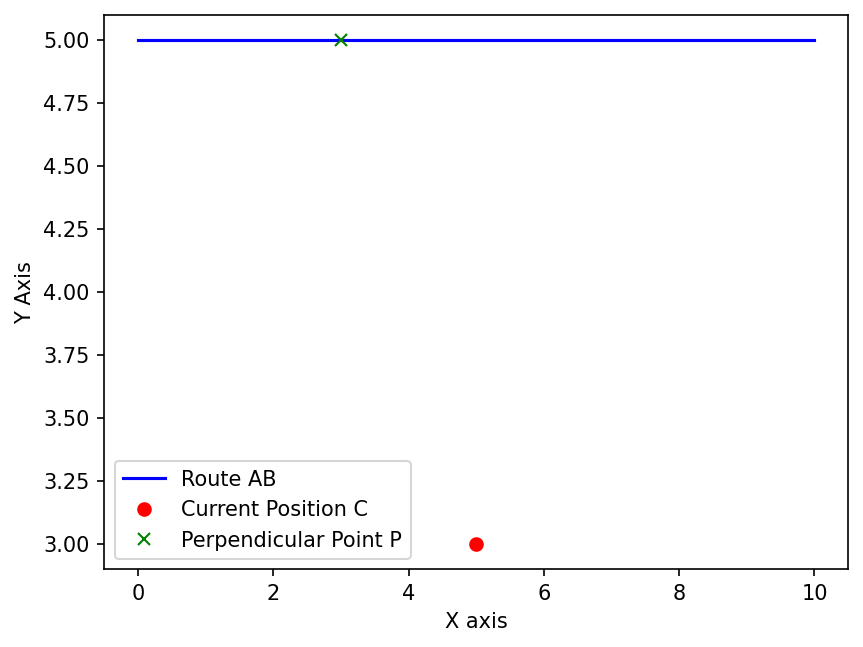

In [8]:
# B = [0, 0]
# A = [0, 10]
# C = [5, 5]

B = [0, 5]
A = [10, 5]
C = [5, 3]

# B = [1, 2]
# A = [2, 1]
# C = [1.7, 1.6]

# A = [0, 0]
# B = [10, 10]
# C = [5, 10]


def main():
    P = measurePointOnRoute(A, B, C)

    fig = plt.figure(dpi=150)
    plt.xlabel("X axis")
    plt.ylabel("Y Axis")

    # Plot the original route (line from A to B)
    plt.plot([A[0], B[0]], [A[1], B[1]], color='blue', linestyle='-', label="Route AB")

    # Plot the current position (C)
    plt.plot(C[0], C[1], 'ro', label='Current Position C')

    # Plot the target point (P)
    plt.plot(P[0], P[1], 'gx', label='Perpendicular Point P')

    plt.legend()


    # FOR TESTING ONLY PRINTING OUT THE ANGLE


    AB = getVector(A, B)
    CP = getVector(C, P)

    dot = dotproduct(AB, CP)
    mag_AB = math.sqrt(AB[0]**2 + AB[1]**2)
    mag_CP = math.sqrt(CP[0]**2 + CP[1]**2)

    final = dot / (mag_AB * mag_CP)
    print(math.degrees(math.acos(final)))

main()